# Detecting Spam with Machine Learning

## Data exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
spam = pd.read_csv("spam.csv")

In [3]:
spam

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
spam[spam.Category == "spam"]

,Category,Message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...


In [5]:
from sklearn.feature_extraction.text import CountVectorizer
vec1 = CountVectorizer(stop_words="english", max_features=1000, decode_error="ignore")
X1 = vec1.fit_transform(spam[spam.Category == "spam"].Message)

In [6]:
spamWordFrequency = pd.DataFrame(X1.toarray(), columns=vec1.get_feature_names_out())

In [7]:
spamWordFrequency

,00,000,02,0207,03,04,05,06,07xxxxxxxxx,0800,...,yahoo,year,years,yer,yes,yesterday,yo,yr,yrs,zed
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
743,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
744,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
spamWordFrequency = spamWordFrequency.sum()

In [9]:
spamWordFrequency

00           10
000          29
02            8
0207          3
03           13
             ..
yesterday     3
yo            3
yr           11
yrs           3
zed           6
Length: 1000, dtype: int64

In [10]:
spamWordFrequency = spamWordFrequency.sort_values()

In [11]:
spamWordFrequency

film          2
free2day      2
thurs         2
forget        2
football      2
           ... 
text        125
mobile      127
ur          144
txt         163
free        224
Length: 1000, dtype: int64

Text(0.5, 1.0, 'Most Occuring Words in Spam Messages')

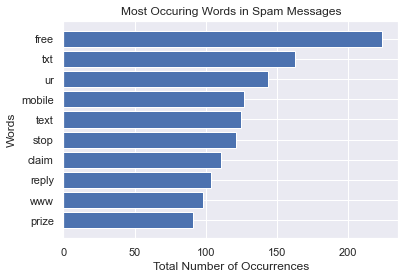

In [12]:
plt.barh(y=spamWordFrequency.index[-10:], width=spamWordFrequency.values[-10:])
plt.ylabel("Words")
plt.xlabel("Total Number of Occurrences")
plt.title("Most Occuring Words in Spam Messages")

We see that 'free' is the most occurring word in the spam messages which makes sense.

######

In [13]:
normalWordFrequency = spam[spam.Category == "ham"]

In [14]:
normalWordFrequency

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...
...,...,...
5565,ham,Huh y lei...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [15]:
from sklearn.feature_extraction.text import CountVectorizer
vec2 = CountVectorizer(stop_words="english", max_features=1000, decode_error="ignore")
X2 = vec2.fit_transform(spam[spam.Category == "ham"].Message)

In [16]:
normalWordFrequency = pd.DataFrame(X2.toarray(), columns=vec2.get_feature_names_out())

In [17]:
normalWordFrequency

,10,12,1st,2nd,30,4th,8th,aathi,abiola,able,...,year,years,yep,yes,yest,yesterday,yijue,yo,yoga,yup
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4820,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4821,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4822,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4823,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
normalWordFrequency = normalWordFrequency.sum().sort_values()

In [19]:
normalWordFrequency

weeks        6
version      6
track        6
lacs         6
lady         6
          ... 
ll         266
ok         288
just       297
lt         316
gt         318
Length: 1000, dtype: int64

Text(0.5, 1.0, 'Most Occuring Words in Normal Messages')

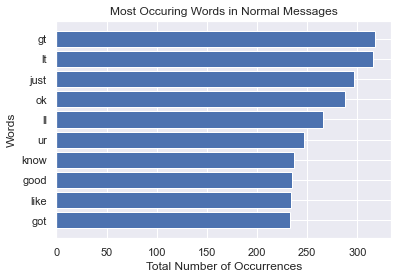

In [20]:
plt.barh(y=normalWordFrequency.index[-10:], width=normalWordFrequency.values[-10:])
plt.ylabel("Words")
plt.xlabel("Total Number of Occurrences")
plt.title("Most Occuring Words in Normal Messages")

Here we see that the most occurring word in normal messages is 'gt'. While this doesn't entirely make sense, it does differ from the spam messages.

###

## Converting text to numerical data

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(stop_words="english", max_features=1240, decode_error="ignore")
X = vec.fit_transform(spam.Message)

In [22]:
y = spam.Category

###

### We will now use PCA to visual the data

In [23]:
from sklearn.decomposition import PCA
pca = PCA(2)
projected = pca.fit_transform(X.toarray())

In [24]:
c_names = y.replace(to_replace=["spam", "ham"], value=[0, 1])

In [25]:
def plot_data(data, labels):
    plt.scatter(data[:, 0], data[:, 1], c=labels, edgecolor='none',
            alpha=0.3, cmap=plt.cm.get_cmap('prism', labels.unique().size))
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.xticks(np.arange(-0.5, 1, 0.2))
    plt.yticks(np.arange(-0.2, 1, 0.2))
    cbar = plt.colorbar()
    cbar.set_ticks(np.arange(0, labels.unique().size))
    plt.show()

Note: Spam is red and normal messages are green

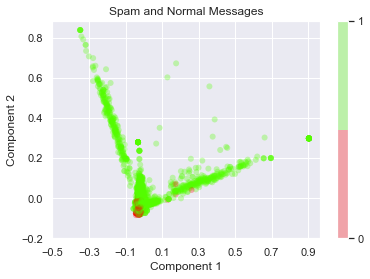

In [26]:
plt.title("Spam and Normal Messages")
plot_data(projected, c_names)

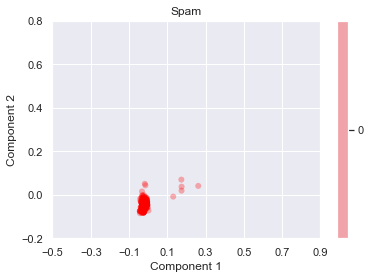

In [27]:
plt.title("Spam")
plot_data(projected[c_names == 0], c_names[c_names == 0])

We can clearly see that the spam is now visibly confined to one area.

###

## Naive Bayes

In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [30]:
cross_val_score(model, X.toarray(), y, cv=2).mean()

0.8374012921751615

#### The Naive Bayes model was approx. 83% accurate so we will try another model

###

## SVC (Support Vector Classifier)

In [31]:
from sklearn.svm import SVC
model = SVC(kernel="linear")
model.fit(X, y)

SVC(kernel='linear')

In [32]:
cross_val_score(model, X.toarray(), y, cv=2).mean()

0.9802584350323044

#### The SVC model is approx. 98% accurate!

###

## Testing

In [33]:
test_vec = TfidfVectorizer(stop_words="english", max_features=1000, vocabulary=vec.get_feature_names_out()) 

In [34]:
def is_spam(text):
    X_test = test_vec.fit_transform([text])
    result = model.predict(X_test)[0]
    if result == "ham":
        return False
    if result == "spam":
        return True

In [35]:
def check_for_spam(text):
    if is_spam(text):
        print("Spam")
    else:
        print("Not spam")

In [36]:
check_for_spam("Hello there")

Not spam


In [37]:
spam.loc[2, "Message"]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [38]:
check_for_spam(spam.loc[2, "Message"])

Spam


In [39]:
check_for_spam("99 Free Spins, Instant Access Click Here If you cannot see the images below.")

Spam


###

###

## Conclusion

In the end, we see that the SVC model worked best for this data set. Our model was able to predict whether a message is spam or not with 98% accuracy.